# Mushroom Hunter

Author: R.J. Trenchard

Date: Nov. 11, 2024

#### Description:
This is an ML project that will try to identify mushrooms based on given characteristics.

#### Source dataset:
https://archive.ics.uci.edu/dataset/848/secondary+mushroom+dataset

#### Reading the raw dataset:
n = nominal
m = metrical
1. cap-diameter (m): float number in cm
2. cap-shape (n): bell=b, conical=c, convex=x, flat=f,
sunken=s, spherical=p, others=o
3. cap-surface (n): fibrous=i, grooves=g, scaly=y, smooth=s,
shiny=h, leathery=l, silky=k, sticky=t,
wrinkled=w, fleshy=e
4. cap-color (n): brown=n, buff=b, gray=g, green=r, pink=p,
purple=u, red=e, white=w, yellow=y, blue=l,
orange=o, black=k
5. does-bruise-bleed (n): bruises-or-bleeding=t,no=f
6. gill-attachment (n): adnate=a, adnexed=x, decurrent=d, free=e,
sinuate=s, pores=p, none=f, unknown=?
7. gill-spacing (n): close=c, distant=d, none=f
8. gill-color (n): see cap-color + none=f
9. stem-height (m): float number in cm
10. stem-width (m): float number in mm
11. stem-root (n): bulbous=b, swollen=s, club=c, cup=u, equal=e,
rhizomorphs=z, rooted=r
12. stem-surface (n): see cap-surface + none=f
13. stem-color (n): see cap-color + none=f
14. veil-type (n): partial=p, universal=u
15. veil-color (n): see cap-color + none=f
16. has-ring (n): ring=t, none=f
17. ring-type (n): cobwebby=c, evanescent=e, flaring=r, grooved=g,
large=l, pendant=p, sheathing=s, zone=z, scaly=y, movable=m, none=f, unknown=?
18. spore-print-color (n): see cap color
19. habitat (n): grasses=g, leaves=l, meadows=m, paths=p, heaths=h,
urban=u, waste=w, woods=d
20. season (n): spring=s, summer=u, autumn=a, winter=w
21. class (n): poisonous=p, edible=e

* TODO: consider adding mushroom name dataset

#### Preparing the dataset

In [47]:
# %%capture
# install external libs for downloading data
%pip install ucimlrepo
%pip install matplotlib
%pip install seaborn
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 37.0 MB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.5/25.5 MB 38.9 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [27]:
# load/download dataset
from ucimlrepo import fetch_ucirepo

# fetch dataset
secondary_mushroom = fetch_ucirepo(id=848)



# data (as pandas dataframes)
X = secondary_mushroom.data.features
y = secondary_mushroom.data.targets

# metadata
# print(secondary_mushroom.metadata)

# variable information
# print(secondary_mushroom.variables)

# create dataframe, the features and targets are already defined but we can
# can make a big object so we can see everything in the data exploration phase
import pandas as pd
df = pd.concat([X, y], axis=1)
df.head()


,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,...,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season,class
0,15.26,x,g,o,f,e,NaN,w,16.95,17.09,...,y,w,u,w,t,g,NaN,d,w,p
1,16.60,x,g,o,f,e,NaN,w,17.99,18.19,...,y,w,u,w,t,g,NaN,d,u,p
2,14.07,x,g,o,f,e,NaN,w,17.80,17.74,...,y,w,u,w,t,g,NaN,d,w,p
3,14.17,f,h,e,f,e,NaN,w,15.77,15.98,...,y,w,u,w,t,p,NaN,d,w,p
4,14.64,x,h,o,f,e,NaN,w,16.53,17.20,...,y,w,u,w,t,p,NaN,d,w,p


# M5 Exploratory Data Analysis (EDA)

    ML workflow
    Basic statistical measures (mean, median, mode)
    Data distribution analysis (histograms, box plots)
    Correlation analysis (scatter plots, correlation matrices)
    Identifying outliers and anomalies
    Using libraries like Pandas, Matplotlib, and Seaborn for EDA
    Creating insightful visualizations (bar charts, heatmaps, pair plots)
    Drawing initial insights from the data

#### Analyze Null counts


In [28]:
# show null counts
df.isnull().sum()

# nulls in these tables are a feature, not a bug
# not all mushrooms present the same.

cap-diameter                0
cap-shape                   0
cap-surface             14120
cap-color                   0
does-bruise-or-bleed        0
gill-attachment          9884
gill-spacing            25063
gill-color                  0
stem-height                 0
stem-width                  0
stem-root               51538
stem-surface            38124
stem-color                  0
veil-type               57892
veil-color              53656
has-ring                    0
ring-type                2471
spore-print-color       54715
habitat                     0
season                      0
class                       0
dtype: int64

In [29]:
# show percentage of missing values
df.isnull().mean() * 100

cap-diameter             0.000000
cap-shape                0.000000
cap-surface             23.121387
cap-color                0.000000
does-bruise-or-bleed     0.000000
gill-attachment         16.184971
gill-spacing            41.040462
gill-color               0.000000
stem-height              0.000000
stem-width               0.000000
stem-root               84.393064
stem-surface            62.427746
stem-color               0.000000
veil-type               94.797688
veil-color              87.861272
has-ring                 0.000000
ring-type                4.046243
spore-print-color       89.595376
habitat                  0.000000
season                   0.000000
class                    0.000000
dtype: float64

In [30]:
# Basic statistical measures (mean, median, mode) of quantitative columns
# grabs all numerical measurements, of which there are only 3!
df_numerical = df.select_dtypes(include=['int64', 'float64'])
df_numerical.describe()

,cap-diameter,stem-height,stem-width
count,61069.000000,61069.000000,61069.000000
mean,6.733854,6.581538,12.149410
std,5.264845,3.370017,10.035955
min,0.380000,0.000000,0.000000
25%,3.480000,4.640000,5.210000
50%,5.860000,5.950000,10.190000
75%,8.540000,7.740000,16.570000
max,62.340000,33.920000,103.910000


In [31]:
# get frequency of occurance in non-numerical data
'''
categorical_data = [
    'cap-shape',
    'cap-surface',
    'cap-color',
    'does-bruise-or-bleed',
    'gill-attachment',
    'gill-color',
    'stem-root',
    'stem-surface',
    'stem-color',
    'veil-type',
    'veil-color',
    'has-ring',
    'ring-type',
    'spore-print-color',
    'habitat',
    'season'
]
'''

df_categorical = df.select_dtypes(include=['object', 'category'])

df_categorical.describe()

,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season,class
count,61069,46949,61069,61069,51185,36006,61069,9531,22945,61069,3177,7413,61069,58598,6354,61069,61069,61069
unique,7,11,12,2,7,3,12,5,8,13,1,6,2,8,7,8,4,2
top,x,t,n,f,a,c,w,s,s,w,u,w,f,f,k,d,a,p
freq,26934,8196,24218,50479,12698,24710,18521,3177,6025,22926,3177,5474,45890,48361,2118,44209,30177,33888


In [32]:
# show correlation matrix for numerical data.
df[['cap-diameter', 'stem-height', 'stem-width']].corr()

,cap-diameter,stem-height,stem-width
cap-diameter,1.00000,0.422560,0.695330
stem-height,0.42256,1.000000,0.436117
stem-width,0.69533,0.436117,1.000000


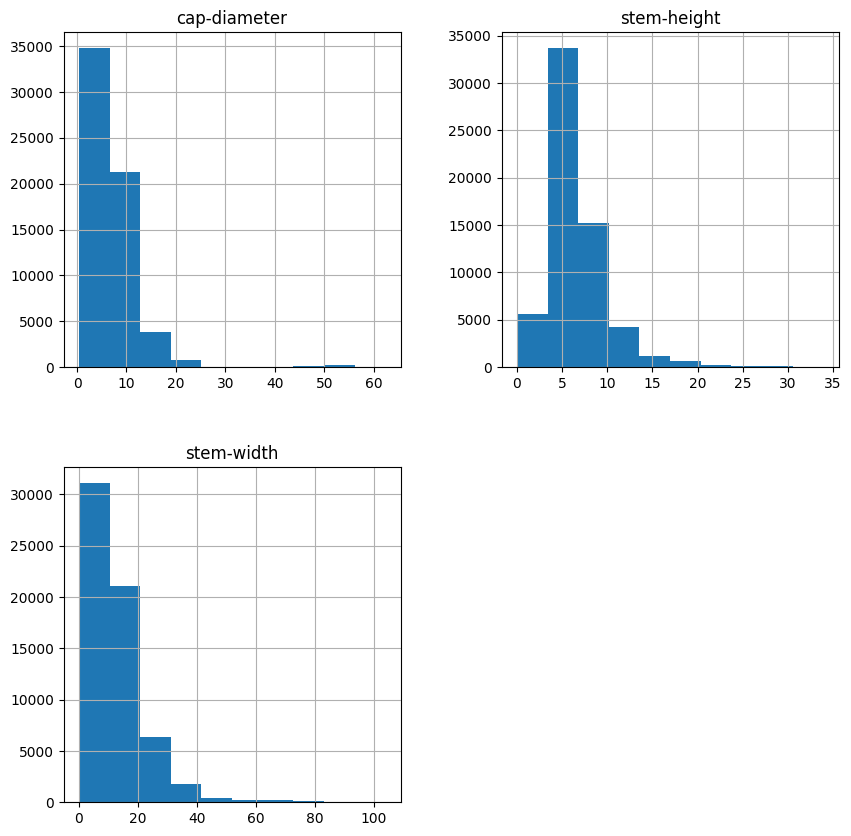

In [43]:
# generate graphs of numerical data to explore any correlations
import matplotlib.pyplot as plt
import seaborn as sns

df_numerical.hist(figsize=(10, 10))
plt.show()



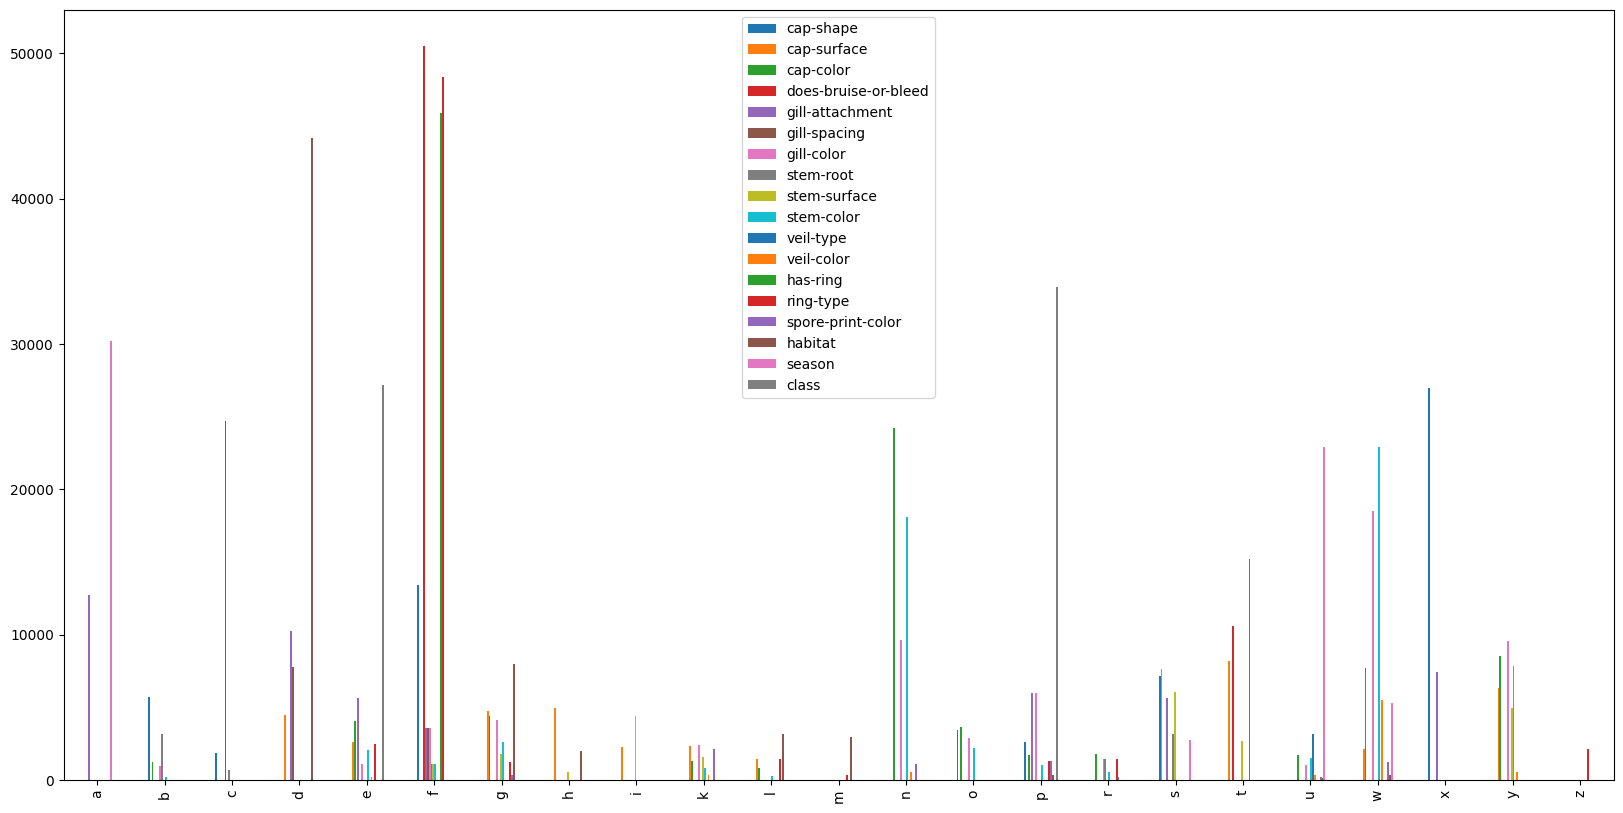

In [34]:
# generate bar charts to visualize categorical data
df_categorical.apply(lambda x: x.value_counts()).plot(kind='bar', figsize=(20, 10))
plt.show()

From this we should change the values of "a-z" to more descriptive meanings.

  # Module 6 - Data Preparation
    Data cleaning techniques
    Handling missing data (imputation strategies)
    Dealing with categorical data (one-hot encoding)
    Feature scaling and normalization
    Handling outliers (when to remove, when to keep)
    Handling class imbalance

In [ ]:
# Data cleaning techniques
# null values imply the absence of a feature, as the case may be with different categories of shrooms.
# for example, a polypore will not have gill spacing, given it has a sponge-like gill structure, not all caps have veils, nor stems (like a reishi)
# we should fill that NaN/null with something that indicates it, perhaps a na or false?
# I would elect to make them explicitly n/a, as they aren't so much missing data
# rather they are not applicable.

# df.loc[:, df.columns != 'veil-type'].fillna("na", inplace=True)
# df.isnull().sum()

# veil type has a special property, we want to avoid changing that right now

In [36]:
# dealing with categorical data
# majority of the data is categorical
# so we will have to find ways to use that
# mapping categorical data to their full name rather than code letters would be useful for the reader,
# or maybe we could build a separate map to reference them

#first, lets make all true/false data into 1/0
df['does-bruise-or-bleed'] = df['does-bruise-or-bleed'].map({'t': 1, 'f': 0})
df['has-ring'] = df['has-ring'].map({'t': 1, 'f': 0})

# rename "class" to be explicit for edibility
df['class'] = df['class'].map({'e': 1, 'p': 0})
df.rename(columns={'class': 'edible'}, inplace=True)

df[['does-bruise-or-bleed', 'has-ring', 'edible']].head()


,does-bruise-or-bleed,has-ring,edible
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0


In [37]:
# dealing with categorical data
# rename coded letters to human readable form

df['cap-shape'] = df['cap-shape'].replace({
    'b': 'bell',
    'c': 'conical',
    'x': 'convex',
    'f': 'flat',
    's': 'sunken',
    'p': 'spherical',
    'o': 'others'
})
df['cap-surface'] = df['cap-surface'].replace({
    'i': 'fibrous',
    'g': 'grooves',
    'y': 'scaly',
    's': 'smooth',
    'h': 'shiny',
    'l': 'leathery',
    'k': 'silky',
    't': 'sticky',
    'w': 'rusty',
    'e': 'fleshy'
})
df['cap-color'] = df['cap-color'].replace({
    'n': 'brown',
    'b': 'buff',
    'g': 'gray',
    'r': 'green',
    'p': 'pink',
    'u': 'purple',
    'e': 'red',
    'w': 'white',
    'y': 'yellow',
    'l': 'blue',
    'o': 'orange',
    'k': 'black'
})
df['gill-attachment'] = df['gill-attachment'].replace({
    'a': 'adnate',
    'x': 'adnexed',
    'd': 'decurrent',
    'e': 'free',
    's': 'sinuate',
    'p': 'pores',
    'f': 'none',
    '?': 'unknown'
})
df['gill-spacing'] = df['gill-spacing'].replace({
    'c': 'close',
    'd': 'distant',
    'f': 'none'
})
df['gill-color'] = df['gill-color'].replace({
    'n': 'brown',
    'b': 'buff',
    'g': 'gray',
    'r': 'green',
    'p': 'pink',
    'u': 'purple',
    'e': 'red',
    'w': 'white',
    'y': 'yellow',
    'l': 'blue',
    'o': 'orange',
    'k': 'black',
    'f': 'none'
})
df['stem-surface'] = df['stem-surface'].replace({
    'i': 'fibrous',
    'g': 'grooves',
    'y': 'scaly',
    's': 'smooth',
    'h': 'shiny',
    'l': 'leathery',
    'k': 'silky',
    't': 'sticky',
    'w': 'rusty',
    'e': 'fleshy',
    'f': 'none'
})
df['stem-root'] = df['stem-root'].replace({
    'b': 'bulbous',
    's': 'swollen',
    'c': 'club',
    'u': 'cup',
    'e': 'equal',
    'z': 'rhizomorphs',
    'r': 'rooted',
    'f': 'none'
})
df['stem-color'] = df['stem-color'].replace({
    'n': 'brown',
    'b': 'buff',
    'g': 'gray',
    'r': 'green',
    'p': 'pink',
    'u': 'purple',
    'e': 'red',
    'w': 'white',
    'y': 'yellow',
    'l': 'blue',
    'o': 'orange',
    'k': 'black',
    'f': 'none'
})
df['veil-color'] = df['veil-color'].replace({
    'n': 'brown',
    'b': 'buff',
    'g': 'gray',
    'r': 'green',
    'p': 'pink',
    'u': 'purple',
    'e': 'red',
    'w': 'white',
    'y': 'yellow',
    'l': 'blue',
    'o': 'orange',
    'k': 'black'
})
df['veil-type'] = df['veil-type'].replace({
    'p': 'partial',
    'u': 'universal',
    'n': 'none'
})
df['ring-type'] = df['ring-type'].replace({
    'c': 'cobwebby',
    'e': 'evanescent',
    'r': 'flaring',
    'g': 'gorged',
    'l': 'large',
    'p': 'pendant',
    's': 'sheathing',
    'z': 'zone',
    'y': 'scaly',
    'm': 'movable',
    'f': 'none',
    '?': 'unknown'
})
df['spore-print-color'] = df['spore-print-color'].replace({
    'n': 'brown',
    'b': 'buff',
    'g': 'gray',
    'r': 'green',
    'p': 'pink',
    'u': 'purple',
    'e': 'red',
    'w': 'white',
    'y': 'yellow',
    'l': 'blue',
    'o': 'orange',
    'k': 'black'
})
df['habitat'] = df['habitat'].replace({
    'g': 'grasses',
    'l': 'leaves',
    'm': 'meadows',
    'p': 'paths',
    'h': 'heaths',
    'u': 'urban',
    'w': 'waste',
    'd': 'woods'
})
df['season'] = df['season'].replace({
    's': 'spring',
    'u': 'summer',
    'a': 'autumn',
    'w': 'winter'
})
# phew.

# validate that everything got changed properly
print("Unique values per column:")
for col in df.columns:
  if df[col].dtype == 'object':
    print(f"{col} (n): {df[col].unique()}")
  else:
    print(f"{col} (m): Range: {df[col].max() - df[col].min()}")

Unique values per column:
cap-diameter (m): Range: 61.96
cap-shape (n): ['convex' 'flat' 'spherical' 'bell' 'conical' 'sunken' 'others']
cap-surface (n): ['grooves' 'shiny' nan 'sticky' 'scaly' 'fleshy' 'smooth' 'leathery' 'd'
 'rusty' 'fibrous' 'silky']
cap-color (n): ['orange' 'red' 'brown' 'gray' 'green' 'white' 'yellow' 'pink' 'purple'
 'buff' 'blue' 'black']
does-bruise-or-bleed (m): Range: 1
gill-attachment (n): ['free' nan 'adnate' 'decurrent' 'sinuate' 'adnexed' 'pores' 'none']
gill-spacing (n): [nan 'close' 'distant' 'none']
gill-color (n): ['white' 'brown' 'pink' 'purple' 'buff' 'gray' 'yellow' 'green' 'red'
 'orange' 'black' 'none']
stem-height (m): Range: 33.92
stem-width (m): Range: 103.91
stem-root (n): ['swollen' nan 'bulbous' 'rooted' 'club' 'none']
stem-surface (n): ['scaly' nan 'smooth' 'silky' 'fibrous' 'shiny' 'sticky' 'grooves' 'none']
stem-color (n): ['white' 'yellow' 'brown' 'purple' 'buff' 'blue' 'green' 'pink' 'red'
 'black' 'gray' 'orange' 'none']
veil-type (n

In [38]:
# handle null values
# null values are a feature on this dataset and would represent a "not applicable" state
# so we will do just that, and rename "nan" to "none"
df.fillna("none", inplace=True)
for col in df.columns:
  if (df[col] == 'none').sum() > 0:
    print(f"Counts of nones in {col}: {(df[col] == 'none').sum()}" )

Counts of nones in cap-surface: 14120
Counts of nones in gill-attachment: 13414
Counts of nones in gill-spacing: 28593
Counts of nones in gill-color: 3530
Counts of nones in stem-root: 52597
Counts of nones in stem-surface: 39183
Counts of nones in stem-color: 1059
Counts of nones in veil-type: 57892
Counts of nones in veil-color: 53656
Counts of nones in ring-type: 50832
Counts of nones in spore-print-color: 54715


In [39]:
#feature scaling and normalization

In [40]:
#handling outliers
# there should be no outliers in this kind of dataset,
# but there are some unusual datatypes that have no known definition
# for those, we will drop those values

def report_changed(df_orig, df_new, drop_val, col):
  dfo_len = len(df_orig)
  dfn_len = len(df_new)
  percentage = ((dfo_len - dfn_len) / dfo_len * 100)
  print(f"Removed {dfo_len - dfn_len} rows with '{drop_val}' from {col}, which is {percentage:.2f}% of all records.")

# remove any "d" cap surface, as it currently has no definition
df_cleaned = df.drop(df[df['cap-surface'] == 'd'].index)
report_changed(df, df_cleaned, 'd', 'cap-surface')


# TODO: veil type should actually have 3 states: universal, partial, none
# figure out something to do with that




Removed 4432 rows with 'd' from cap-surface, which is 7.26% of all records.


In [41]:
#handling class imbalance
# there should be no class imbalance in this kind of dataset, skip

# Module 8 - Machine Learning Algorithms

    Train / Test / Val
    Linear / Logistic Regression
    Decision Trees
    Random Forests / Boosting vs Bagging
    Understanding Accuracy and the Confusion Matrix

In [ ]:
# train/test/validate
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score

#import one-hot from sklearn
from sklearn.preprocessing import OneHotEncoder

# select target
y = df['edible']

# select features
X = df.drop('edible', axis=1)

# convert X values to one-hot
# TODO: ask for help with categorical data, oh no!
OneHot_X = OneHotEncoder().fit_transform(X)

# get numerical features
# selected_features = ['cap-diameter', 'stem-height', 'stem-width']
# X = selected_features = pd.get_dummies(X, dtype=int)

# create training/testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_OH, X_test_OH, y_train_OH, y_test_OH = train_test_split(OneHot_X, y, test_size=0.2, random_state=42)

X

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 1221380 stored elements and shape (61069, 9547)>

In [50]:
# reusable code can be done with subroutines.
def calculate_using_model(model_type, X_train, X_test, y_train, y_test):
  model = model_type()
  model.fit(X_train, y_train)

  # make prediction
  y_pred = model.predict(X_test)

  # calculate accuracy
  accuracy = model.score(X_test, y_test)

  # get coefficients (if possible)
  try:
    model.coef_
    coefficients = model.coef_
  except AttributeError:
    coefficients = None

  # calculate mse
  mse = mean_squared_error(y_test, y_pred)

  # calculate r value
  r2 = r2_score(y_test, y_pred)

  # return as a tuple
  return (model, y_pred, coefficients, accuracy, mse, r2)

def report_model(model, y_pred, coefficients, accuracy, mse, r2):
  print("Model:", model)
  print("Predictions:", y_pred)
  print("Accuracy:", accuracy)
  print("Mean Squared Error:", mse)
  print("R-squared:", r2)
  if coefficients is not None:
    print("Coefficients:\n", pd.DataFrame(coefficients))

    print()

In [ ]:
#linear/logistic regression
# i don't think linear regression applies well to this dataset, but we can try it against the numerical data to see if there's any possible correlations
# do linear regression


from sklearn.linear_model import LinearRegression

# generate a linear regression using the features available.
linear_tuple = calculate_using_model(
    LinearRegression,
    X_train,
    X_test,
    y_train,
    y_test
)

# report the linear model
report_model(*linear_tuple)

Model: LinearRegression()
Predictions: [0.60590004 0.11745669 0.86363351 ... 0.2864327  0.81188927 0.66525848]
Accuracy: 0.3806250446067754
Mean Squared Error: 0.152613015265864
R-squared: 0.3806250446067754
Coefficients:
              0
0    -0.572253
1    -0.650012
2    -0.436080
3    -0.468980
4    -0.402840
...        ...
9542 -0.022690
9543 -0.061929
9544  0.029081
9545 -0.081253
9546  0.114101

[9547 rows x 1 columns]



In [58]:
# do logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logistic_tuple = calculate_using_model(
    LogisticRegression,
    X_train,
    X_test,
    y_train,
    y_test
)

report_model(*logistic_tuple)

# unusable, only for demonstration

Model: LogisticRegression()
Predictions: [1 0 1 ... 0 0 1]
Accuracy: 0.865809726543311
Mean Squared Error: 0.13419027345668905
R-squared: 0.45539314263826036
Coefficients:
        0         1         2         3         4         5         6     \
0 -0.032702 -0.222818 -0.226393 -0.137611 -0.198376 -0.852152 -0.637638   

       7        8         9     ...      9537      9538      9539      9540  \
0 -0.498815 -0.64066 -0.586546  ... -0.310408 -0.496717 -3.719867  1.998372   

       9541      9542     9543      9544      9545      9546  
0  1.971989 -0.644714 -1.01101  0.065356 -1.118573  0.231916  

[1 rows x 9547 columns]



/Users/richardtrenchard/Downloads/MushroomHunter/.venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# using a decision tree
from sklearn.tree import DecisionTreeClassifier

decision_tree_tuple = calculate_using_model(
    DecisionTreeClassifier,
    X_train,
    X_test,
    y_train,
    y_test
)

report_model(*decision_tree_tuple)

# unlikely to be true

In [57]:
#random forests/boosting vs bagging

# generate random forest
from sklearn.ensemble import RandomForestClassifier
random_forest_tuple = calculate_using_model(
    RandomForestClassifier,
    X_train,
    X_test,
    y_train,
    y_test
)

#report random forest
report_model(*random_forest_tuple)

Model: RandomForestClassifier()
Predictions: [1 0 1 ... 1 0 1]
Accuracy: 0.9996725069592272
Mean Squared Error: 0.0003274930407728836
R-squared: 0.9986708801528694


In [ ]:
# understanding accuracy and the confusion matrix
# generate confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt






#### Module 9
    Cross-validation
    Overfitting / underfitting and handling each
    Learning and validation curves

#### Module 10 - Model Improvements

    Ensemble methods
        Voting classifiers
        Stacking
        Blending
    Hyperparameter tuning
        Grid search
        Random search
        Bayesian optimization
    Error analysis and iterative improvement

#### Module 11 - Model Deployment

    Creating a simple API for model deployment (using Flask)
    Monitoring model performance in production
    Ethical considerations in AI/ML
        Bias and fairness in machine learning
        Privacy concerns and data protection
        Transparency and explainability of models
    Responsible AI practices
    Legal and regulatory considerations (e.g., GDPR, CCPA)
    Strategies for ongoing model monitoring, maintenance, and improvement

In [56]:
# ensure flask is downloaded into project/venv
%pip install flask


  Using cached jinja2-3.1.4-py3-none-any.whl.metadata (2.6 kB)
  Using cached itsdangerous-2.2.0-py3-none-any.whl.metadata (1.9 kB)
  Using cached click-8.1.7-py3-none-any.whl.metadata (3.0 kB)
  Using cached MarkupSafe-3.0.2-cp313-cp313-macosx_10_13_universal2.whl.metadata (4.0 kB)
Using cached click-8.1.7-py3-none-any.whl (97 kB)
Using cached itsdangerous-2.2.0-py3-none-any.whl (16 kB)
Using cached jinja2-3.1.4-py3-none-any.whl (133 kB)
Using cached MarkupSafe-3.0.2-cp313-cp313-macosx_10_13_universal2.whl (14 kB)
Note: you may need to restart the kernel to use updated packages.


In [ ]:
# create flask endpoint
from flask import Flask, jsonify, request

app = Flask("MushroomHunter")

# take in an input, return "edible" or "non-edible" chance
@app.route('/eval', methods=['GET'])
def evaluate_shroom():
    print(request.query_string)
    pass


app.run(debug=True, port=3000)


**Monitoring model performance in production**
* Being able to retrieve r-values, among other metrics, in the API would be a good start for this. an end-user or dev can easily retrieve values to evaluate performance.

**Ethical considerations in AI/ML**
* Bias and fairness in machine learning
    *   This sort of model is very biased towards the "nonedible" as a matter of safety, this includes:
        *  unpalatable mushrooms (may have nutritional qualities, but too bitter to eat)
        *  toxic mushrooms
        *  hallucinogenic mushrooms (for obvious, legal reasons.)
        *  unsubstantial mushrooms (edible, but not worth your time)
        *  unknown mushrooms (edibility has not yet been tested)

* Privacy concerns and data protection
    *   This sort of model should be safe in terms of privacy and data (fungi doesn't seem to care!)
        
* Transparency and explainability of models
    *   Explained further down, this model needs to maintain transperancy of the model, where the data comes from, the accuracy of the data, and what it represents. This data shall not be used as an authoritative tool to say whether a mushroom is or is not edible.
    
**Responsible AI practices**
* This model shall adhere to responsible AI practices:
  * Fairness
    * This model will not have bias with respect to people, and errs on the side of caution in its biases when classifying edibility
  * Transperancy
    * The end-user shall know that this model is not an authority on classification
  * Accountability
    * As with Transperancy, The model shall warn end-users about the dangers of accepting results at face value
  * Privacy
    * Not a concern with this model
  * Safety
    * This model should maintain safety, and its model should not be able to be hijacked by unintended inputs
  * Inclusivity
    * N/A, all mushrooms welcome
  * Ethical Use
    * This model shall align with societal values, and may only be used for public good.
  * Continuous monitoring
    * The dataset is liable to changes, as such it may break. Given the dataset is exhaustive with most aspects of shrooms, this is unlikely to happen; however, this may change the models accuracy metrics.

**Legal and regulatory considerations (e.g., GDPR, CCPA)**
  * as with any web resource on potentially toxic substances, it should *not* be used as a decisionmaker when inspecting the edibility of wild mushrooms. Many mushrooms have look-alikes, and while most are fine, the deadly ones are extremely deadly.
  * As a result, this means that this ML model needs to make serious consideration for the legal principle of **Liability for Harm**. End-users need to know that this is only for demonstration, perhaps as a tool for starting the process of classification, but not assuring it.
  * Because of its liability for harm, it must also maintain the principle of **transparency** to assure end-users of what kind of safety they might expect from this tool.

**Strategies for ongoing model monitoring, maintenance, and improvement**
    * Strategies as mentioned previously should include being able to get the model performance metrics via the API
    * future iterations should probably consider packaging this in a dedicated python script.
    * permanent storage of data is a good idea for maintenance, what if the server goes down?

#### Dataset Citation
Wagner, D., Heider, D., & Hattab, G. (2021). Secondary Mushroom [Dataset]. UCI Machine Learning Repository. https://doi.org/10.24432/C5FP5Q.